# Final Project

For the following project, you will be working with a movie dataset. The dataset is [here](https://drive.google.com/file/d/1R53inu8Jcb9GGoyiuVnBMVnO7XvCaJAE/view?usp=drive_link). The dataset columns are as follows:

* Title: The movie's title
* Genre: The movie's genre
* Stars: The number of famous actors in the movie
* Runtime: The length of the movie's runtime
* Budget: How much was spent on filming the movie (in millions)
* Promo: How much money was spent promoting the movie (in millions)
* Season: The season in which the movie was released
* Rating: The movie's rating
* R1: Reviewer 1's review
* R1: Reviewer 2's review
* R1: Reviewer 3's review

And the target variable:

* Success: Whether the film was a success or a flop

Fill in the answers to questions in the text field, and show your code below.

# Data loading

Load the data

In [139]:
import pandas as pd
df = pd.read_csv("/content/CMSC320FinalProjectData.csv")

# Data Cleaning

List the three biggest data errors below, with a summary of how you fixed them and why you choose that method:


*
*
*

In [140]:
# 1. Stars scale from 0 to 100, but most scale between 0-5.
# Error: Data error is caused by evolving labeling scheme.
# Solution: Change all 100 to 5, assuming the data uses a 5-star ranking system to reduce data disparity.
df.loc[df["Stars"] == 100, "Stars"] = 5
# 2. Some movies have runtime of 0, which is impossible for a movie.
# Error: Data error is caused by missing/incorrect data.
# Solution: Substitute all movies with missing runtimes with average runtime of all movies.
df.loc[df["Runtime"] == 0, "Runtime"] = df["Runtime"].mean()
# 3. Some movies have an egregiously large budget if scaled to millions of dollars.
# Error: Data error is caused by incorrect data.
# Solution: Lower each incorrect budget entry to an amount comparable to its promotional budget.
df.loc[df['Budget'] > 999, 'Budget'] /= 10**6

# Data Exploration





Does Season have a stastically significant impact on a movie's success?

**p-value:** 0.005716268505111858

In [141]:
import numpy as np
import scipy as sp
crosstab = pd.crosstab(df['Season'], df['Success'])
# Null Hypothesis: There is no relationship between season and success.
# Alternative Hypothesis: There is a relationship between season and success.
statistic, pvalue, dof, expected_freq = sp.stats.chi2_contingency(crosstab)
print(f"P-Value is {pvalue}")
if pvalue <= 0.05:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis")
# The season a movie is released in has a statistically significant impact on a movie's success.

P-Value is 0.005716268505111858
Reject the null hypothesis.


Do seasons have a statistically significant distribution of ratings?

**p-value:** 0.21507814500508263

In [143]:
crosstab = pd.crosstab(df['Season'], df['Rating'])
# Null Hypothesis: There is no relationship between season and rating.
# Alternative Hypothesis: There is a relationship between season and rating.
statistic, pvalue, dof, expected_freq = sp.stats.chi2_contingency(crosstab)
print(f"P-value is {pvalue}")
if pvalue <= 0.05:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis")
# The seasons movies are released in does not have a statistically significant distrubition on ratings.

P-value is 0.21507814500508263
Fail to reject the null hypothesis


Who is the harshest critic (highest precent of negative reviews)?

**Critic:** R1

In [144]:
# Define negative keywords indicating negative sentiment for sentiment analysis
negative_keywords = ['fails', 'lacks', 'attempt', 'lack', 'uninspired', 'disjointed', 'unconvincing', 'fail', 'underwhelming', 'contrived', 'predictable', 'struggles', 'confusing', 'lackluster', 'forgettable']

# Function to check if a review contains negative sentiment
def has_negative_sentiment(review):
    for keyword in negative_keywords:
        if keyword in review:
            return True
    return False

# Count negative reviews for each reviewer
reviewers = ['R1', 'R2', 'R3']
negative_reviews_count = {}

for reviewer in reviewers:
    negative_reviews_count[reviewer] = df[df[reviewer].apply(lambda x: has_negative_sentiment(x))].shape[0]

# Compute the percentage of negative reviews for each reviewer
total_reviews = len(df)  # Assuming each row represents a review
percentage_negative_reviews = {}

for reviewer, count in negative_reviews_count.items():
    percentage_negative_reviews[reviewer] = (count / total_reviews) * 100

# Identify the critic with the highest percentage of negative reviews
harshest_critic = max(percentage_negative_reviews, key=percentage_negative_reviews.get)
highest_percentage = percentage_negative_reviews[harshest_critic]

print(f"The harshest critic is {harshest_critic} with {highest_percentage:.2f}% negative reviews.")

The harshest critic is R1 with 67.04% negative reviews.


What is the covariance between promotional budget and the filming budget?

**Cov:** 1907.0543228223628

In [145]:
df['Promo'].cov(df['Budget'])

1907.0543228223628

# Data Visualization

Create a chart that compares the distribution of the budget for each different number of stars. (It does not need to be particularly appealing.

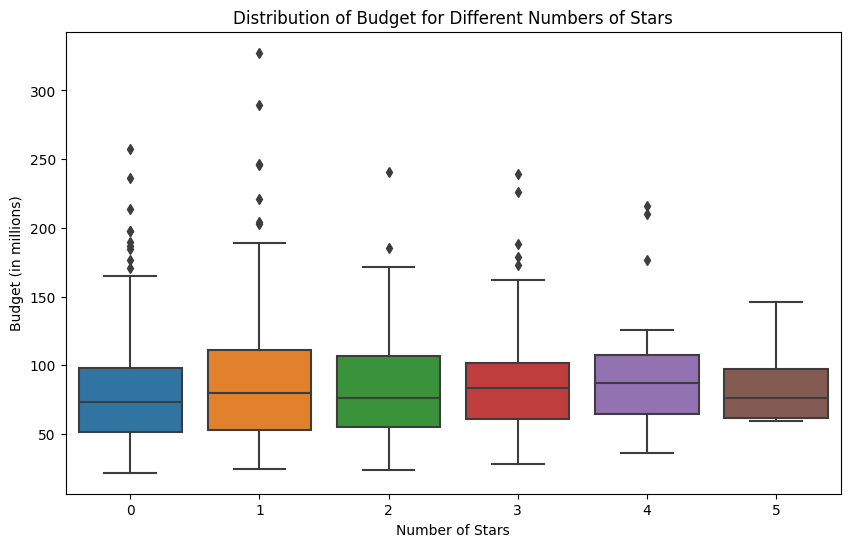

In [146]:
# Comparing distribution of two variables.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Stars', y='Budget', data=df)
plt.title('Distribution of Budget for Different Numbers of Stars')
plt.xlabel('Number of Stars')
plt.ylabel('Budget (in millions)')
plt.show()

Create a graph showing the average movie budget over time.

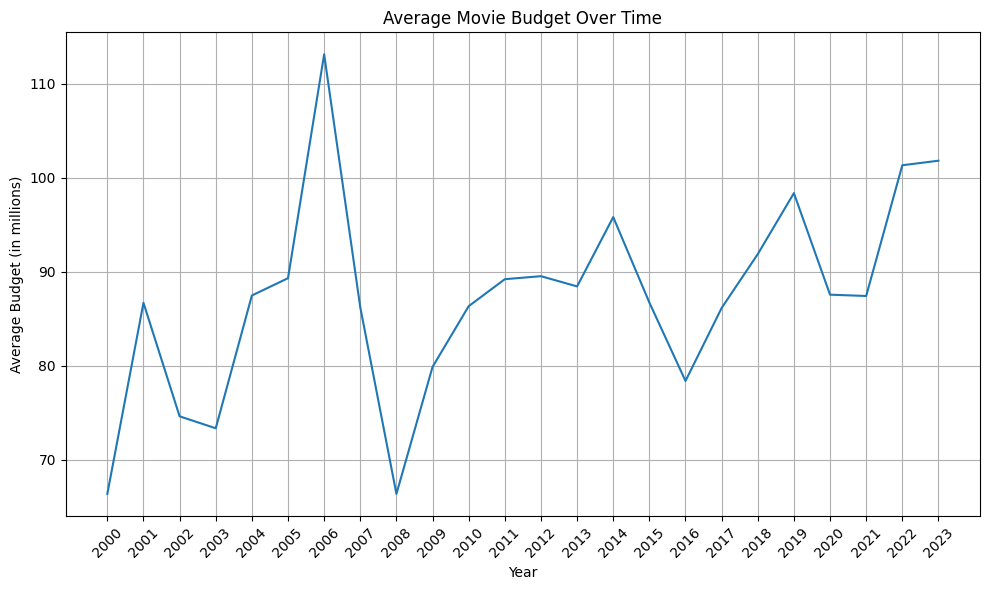

In [147]:
# Calculate average budget for each year
average_budget_by_year = df.groupby('Year')['Budget'].mean()

# Create a line plot to show the average movie budget over time
plt.figure(figsize=(10, 6))
plt.plot(average_budget_by_year.index, average_budget_by_year.values)
plt.title('Average Movie Budget Over Time')
plt.xlabel('Year')
plt.ylabel('Average Budget (in millions)')
plt.grid(True)
plt.xticks(average_budget_by_year.index, rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Feature Engineering

List any features you choose to create (if you are creating many features based on one column, you do not need to list them separately.) You are not required to create any features if you do not wish to. You may create any number of additional features.


*
*

In [148]:
#One Hot Encoding for categorical columns
cat_columns = ['Season', 'Rating', 'Genre']
df_encoded = pd.get_dummies(df, columns = cat_columns)

# Modeling

Create a model of your choice.

**Model type choosen:** Random Forests

In [149]:
from sklearn.ensemble import RandomForestClassifier

# Drop the movie title and reviewer columns for simplicity
df_encoded.drop(['Unnamed: 0','Title', 'R1', 'R2', 'R3'], axis=1, inplace=True)

# Define features and target variable
X = df_encoded.drop('Success', axis=1)  # Features
y = df_encoded['Success']  # Target variable

# Initialize a RandomForestClassifier
model = RandomForestClassifier()

# Testing

Shuffle your data and break it into a 10% test set and 90% training set. Show your model's accuracy on the test set. In order to get full credit, the model's accuracy must be higher than 50%.

**Model accuracy:** 78%

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

# Train the RandomForestClassifier
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


Show the confusion matrix for your model. To get full credit, your false positive rate and false negative rate must be under 30%.


**False negative rate:** 91.67%

**False positive rate:** 2.38%

In [156]:
from sklearn.metrics import confusion_matrix
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_test, y_pred).ravel()

# Calculate false positive rate (FPR) and false negative rate (FNR)
total_negative = true_negative + false_positive
total_positive = false_negative + true_positive

false_negative_rate = (false_negative / total_positive) * 100
false_positive_rate = (false_positive / total_negative) * 100

print(f"False negative rate: {false_negative_rate}")
print(f"False positive rate: {false_positive_rate}")

False negative rate: 91.66666666666666
False positive rate: 2.380952380952381


What was the most important feature for your model? Don't guess, either look up how to check or do your own tests.

**Most important feature:** Budget


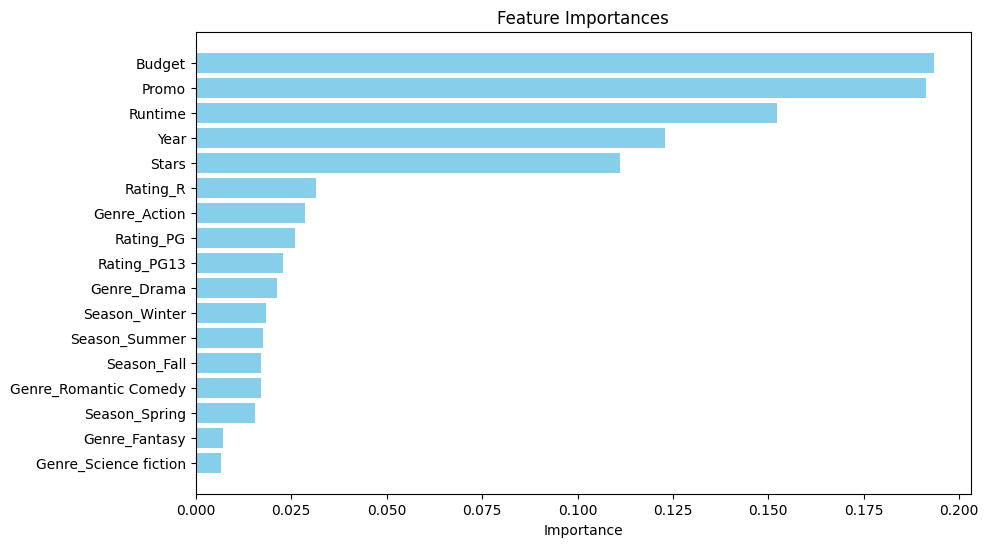

In [138]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()